# OpenCV 

* https://docs.opencv.org/4.x/
* https://pypi.org/project/opencv-python/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [2]:
import numpy as np
np.__version__

'1.22.3'

In [3]:
import cv2 as cv
cv.__version__

'4.6.0'

In [64]:
!ls -l ../../data/people/

total 3088
-rw-r--r-- 1 olli olli  792986 Jul  7 11:02 body-vs-soul-meyer.jpg
-rw-r--r-- 1 olli olli  279121 Jul  7 11:02 gay-or-not.jpeg
-rw-r--r-- 1 olli olli  654048 May 13 10:13 olli1.jpg
-rw-r--r-- 1 olli olli 1319292 Jul  7 11:02 olli2.jpg
-rw-r--r-- 1 olli olli  103190 Jul  7 11:02 olli3.jpg


In [187]:
# img = cv.imread('../../data/people/olli1.jpg')
img = cv.imread('../../data/people/olli2.jpg')
# img = cv.imread('../../data/people/olli3.jpg')
# img = cv.imread('../../data/people/olli4.jpg')

# img = cv.imread('../../data/people/gay-or-not.jpeg')

# img = cv.imread('../../data/people/body-vs-soul-meyer.jpg')

In [188]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

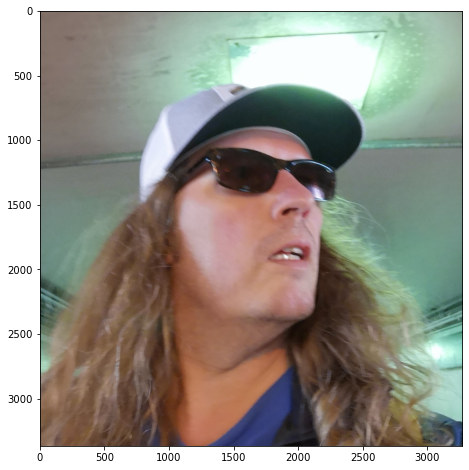

In [189]:
plt.imshow(img_rgb);

In [190]:
 img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

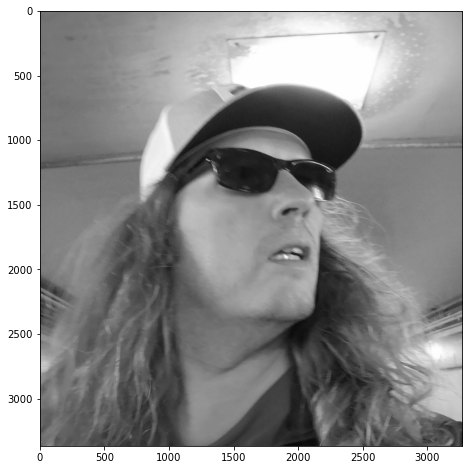

In [191]:
plt.imshow(img_gray, cmap='gray');

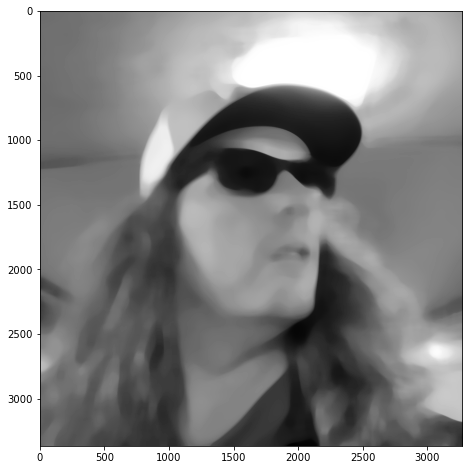

In [192]:
# aperture = 31
# aperture = 21
# aperture = 51
# aperture = 71
# aperture = 91
aperture = 101
img_gray_blur = cv.medianBlur(img_gray, ksize=aperture)
plt.imshow(img_gray_blur, cmap='gray');

142.0

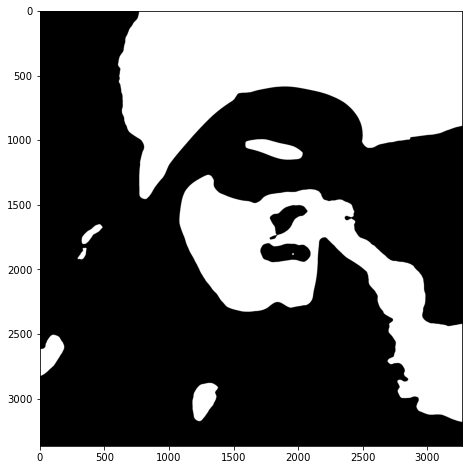

In [193]:
ret, thresh_img = cv.threshold(img_gray_blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
ret

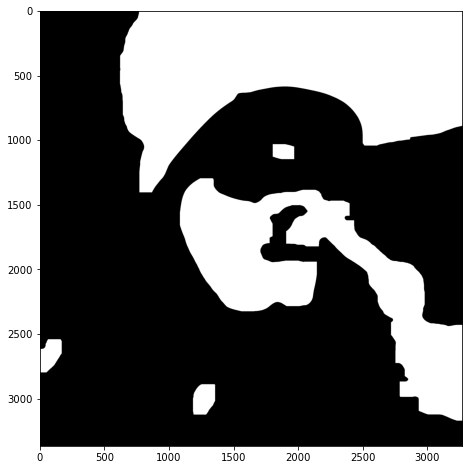

In [194]:
kernel = np.ones((25,25),np.uint8)
opening_img = cv.morphologyEx(thresh_img,cv.MORPH_OPEN,kernel, iterations = 4)
plt.imshow(opening_img, cmap='gray');

In [195]:
# cv.morphologyEx?

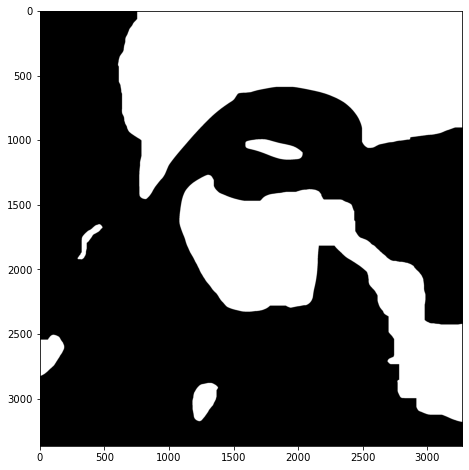

In [196]:
kernel = np.ones((25,25),np.uint8)
opening_img = cv.morphologyEx(thresh_img,cv.MORPH_CLOSE,kernel, iterations = 5)
plt.imshow(opening_img, cmap='gray');

In [197]:
detection_src_img = opening_img
# detection_src_img = img_gray_blur

In [198]:
# contours, hierarchy = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv.findContours(detection_src_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours[0].shape

(308, 1, 2)

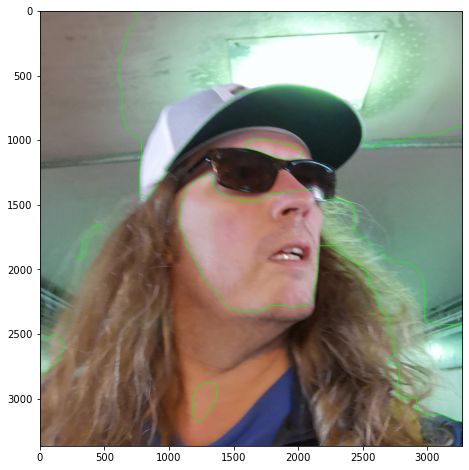

In [199]:
contours_img = cv.drawContours(img_rgb.copy(), contours, -1, (0,255,0), 3)
plt.imshow(contours_img)


In [200]:
rows = detection_src_img.shape[0]
rows

3365

In [201]:
# https://docs.opencv.org/4.x/d4/d70/tutorial_hough_circle.html
# cv.HoughCircles?

In [202]:
threshold_canny_edge_detector = 100
threshold_circle_centers = 30

circles = cv.HoughCircles(
    image=detection_src_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=rows,
    param1=threshold_canny_edge_detector, 
    param2=threshold_circle_centers,
    minRadius=0, 
    maxRadius=0)
circles

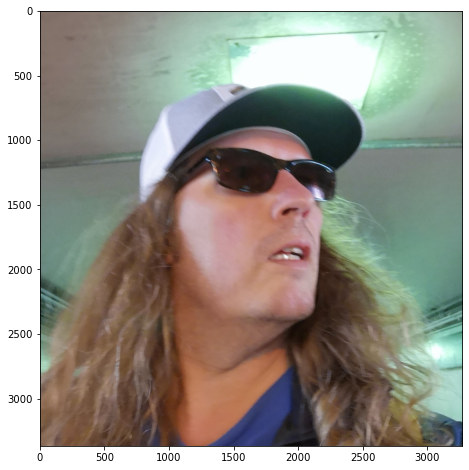

In [203]:
img_hough = img_rgb.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img_hough, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img_hough, center, radius, (255, 0, 255), 3)
plt.imshow(img_hough);

In [16]:
# cv.imwrite('detection.jpg', cv.cvtColor(img_hough, cv.COLOR_RGB2BGR))

True